In [1]:
%load_ext autoreload
from pathlib import Path

In [2]:
%autoreload 2

from process.parse_markdown import load_content
from process.graph import DocumentGraph

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1500: RuntimeWarning: Error importing Gtk module: cannot import name '_gi' from partially initialized module 'gi' (most likely due to a circular import) (/usr/lib/python3/dist-packages/gi/__init__.py); GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [170]:
content_directory = Path("process/test-content")
doc_map = load_content(content_directory)
graph = DocumentGraph(doc_map=doc_map)

In [172]:
v = next(graph.vertices)
v.uuid

'2da3dd4c-2d5b-4f94-82b4-67bcda214798'

In [76]:
graph.predicates

['in', 'is', 'ref', 'cite']

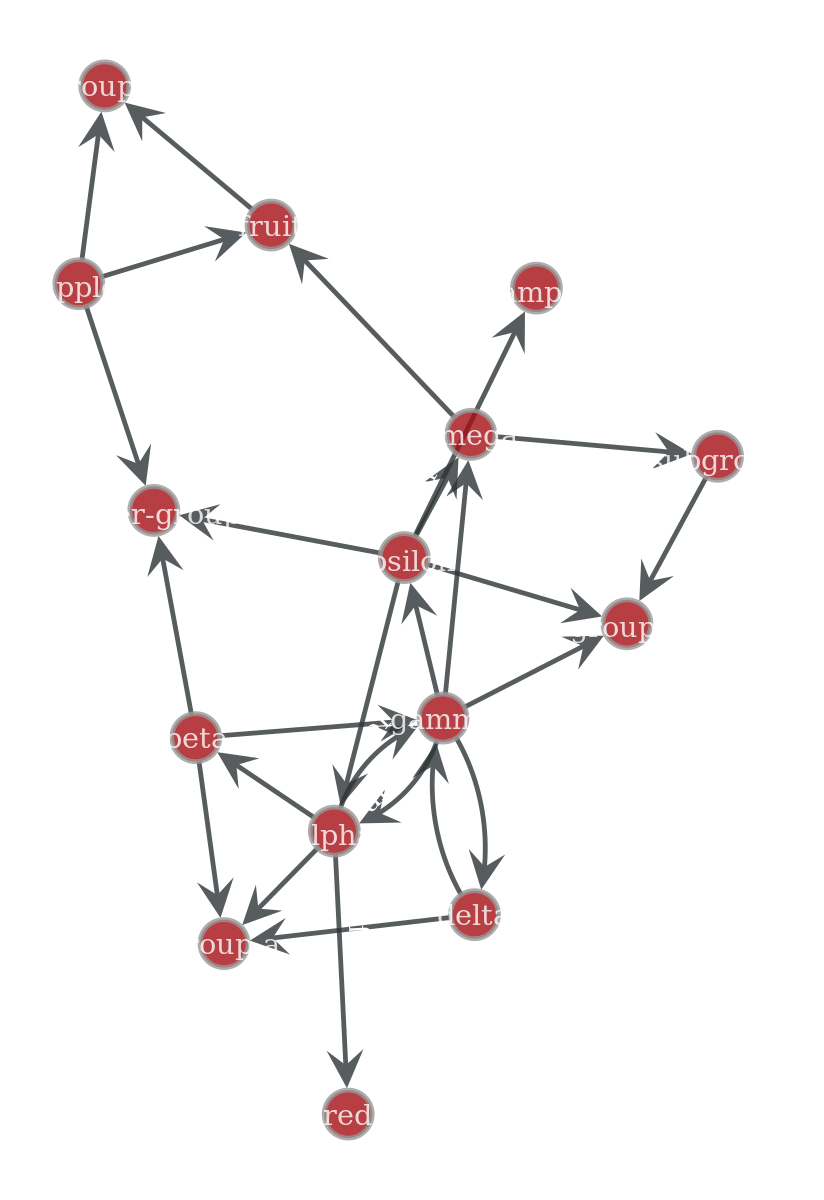

In [148]:
#layout = graph.layout("sfdp")
graph.draw(output_size=(1200,600))

In [157]:
graph["omega"].shortest_path_to(graph["group-b"])

([<DocumentVertex 'omega'>,
  <DocumentVertex 'subgroup'>,
  <DocumentVertex 'group-b'>],
 [<DocumentEdge "'omega' -[in]-> 'subgroup'">,
  <DocumentEdge "'subgroup' -[in]-> 'group-b'">])

In [165]:
list(graph["alpha"].out_edges())[2].elements["is"]

In [167]:
import rdflib
rdflib.graph.Graph

rdflib.graph.Graph

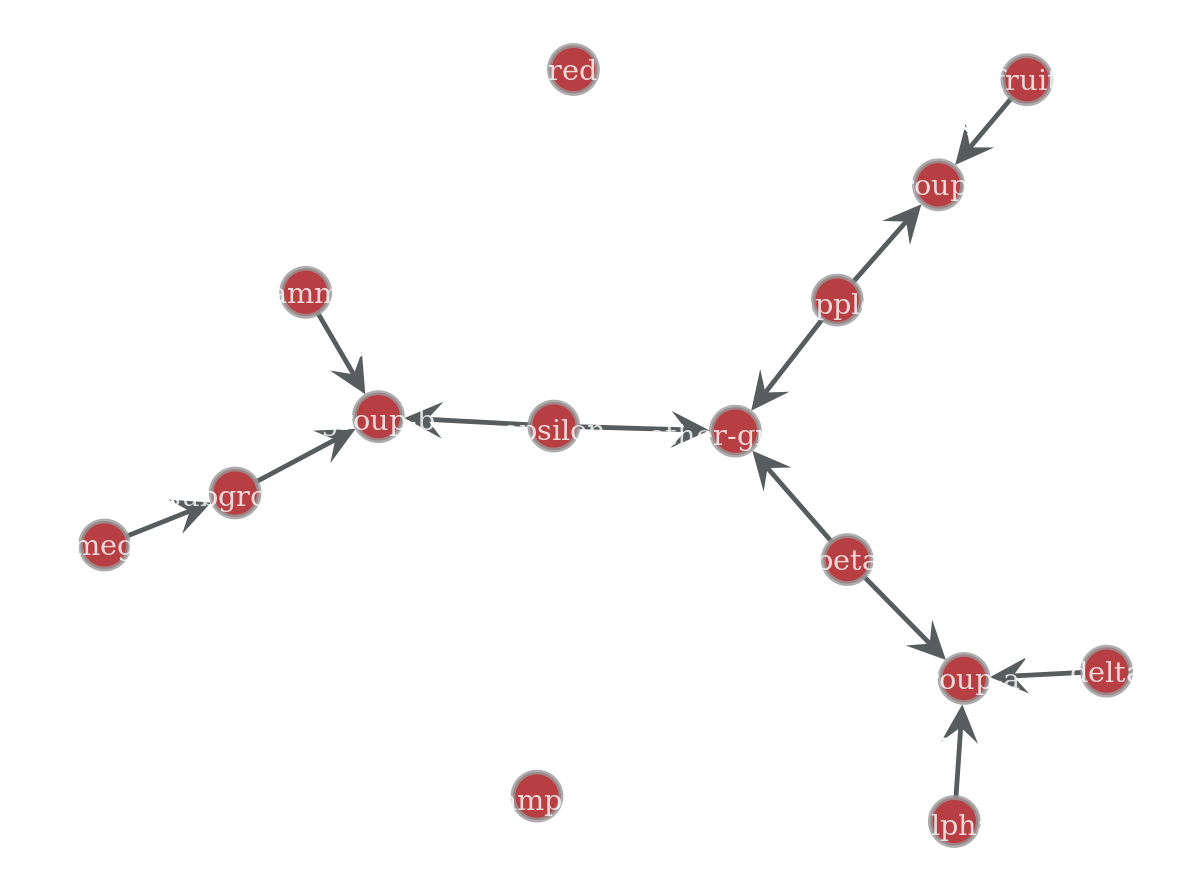

In [88]:
ingraph = graph.pgraph_in
ingraph.draw()

In [146]:
graph["alpha"]

<DocumentVertex 'alpha'>

In [145]:
v.document

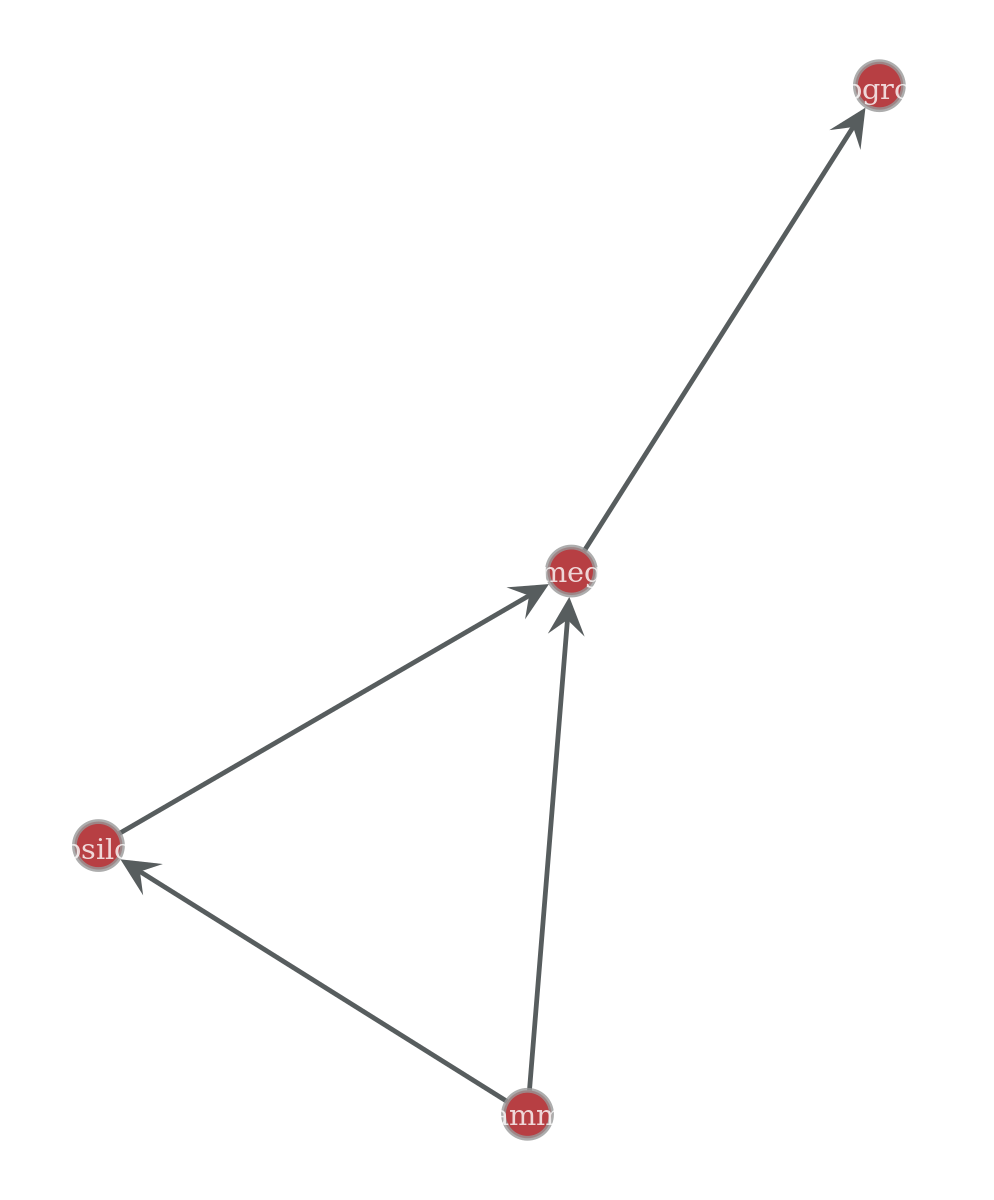

In [114]:
sg = graph.subgraph_around(graph.vertex_map["group-b"], False)
sg.draw()

In [208]:
schema = graph.graphql_schema
schema.execute("""
{
    nodeByName(name: "gamma")
    {
        id
        name
        allEdges { source { name } }
    }
}
""")

ExecutionResult(data={'nodeByName': {'id': '633b93c2-40ae-46a6-ac00-130315aeb895', 'name': 'gamma', 'allEdges': [{'source': {'name': 'gamma'}}, {'source': {'name': 'gamma'}}, {'source': {'name': 'gamma'}}, {'source': {'name': 'gamma'}}, {'source': {'name': 'gamma'}}, {'source': {'name': 'alpha'}}, {'source': {'name': 'delta'}}, {'source': {'name': 'beta'}}]}}, errors=None)

In [180]:
schema

ExecutionResult(data={'nodeByName': {'id': 'aa6f2fc3-e4da-4e8f-a156-608016504415', 'name': 'alpha'}}, errors=None)

In [125]:
a, b = parsed
b["n_nodes"]

13